## Compare Data Completeness Over Time

**Description**: Analyze the trend of missing data in `"sales_data.csv"` over several months stored in a "date" column. Visualize missing data rates by month.

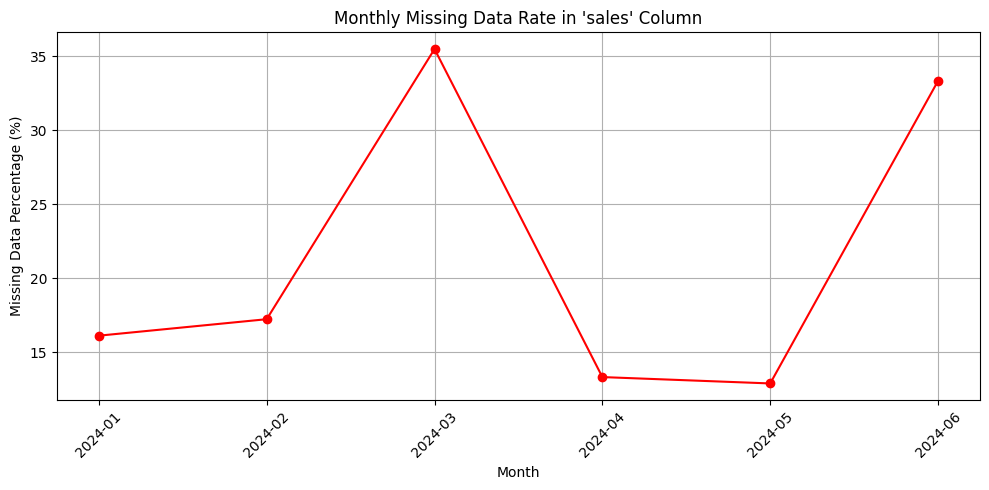

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate or Load Data (you can replace this with pd.read_csv("sales_data.csv"))
np.random.seed(0)
date_range = pd.date_range(start="2024-01-01", end="2024-06-30", freq="D")
data = {
    "date": date_range,
    "sales": np.random.choice([np.nan, 100, 200, 300, 400, 500], size=len(date_range), p=[0.2, 0.2, 0.2, 0.2, 0.1, 0.1])
}
df = pd.DataFrame(data)

# Step 2: Ensure 'date' is datetime
df["date"] = pd.to_datetime(df["date"])

# Step 3: Create 'month' column
df["month"] = df["date"].dt.to_period("M").astype(str)

# Step 4: Calculate missing rate per month
missing_rate = df.groupby("month")["sales"].apply(lambda x: x.isnull().mean() * 100).reset_index(name="Missing_Percentage")

# Step 5: Plot missing data rate over time
plt.figure(figsize=(10, 5))
plt.plot(missing_rate["month"], missing_rate["Missing_Percentage"], marker='o', color='red')
plt.title("Monthly Missing Data Rate in 'sales' Column")
plt.xlabel("Month")
plt.ylabel("Missing Data Percentage (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()